In [3]:
# from pythainlp import word_tokenize
# from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
# from pythainlp.word_vector import thai2vec 
import numpy as np
import pandas as pd
%reload_ext autoreload
%autoreload 2
# %matplotlib inline

from pythainlp.tokenize import word_tokenize,sent_tokenize
from gensim.models import KeyedVectors
from gensim.models import Word2Vec
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from scipy.cluster import hierarchy
import dill as pickle
import pandas as pd
import pythainlp.word_vector
# model = word_vector.get_model()
model_path = 'thwiki_data/models/'

In [6]:
df = pd.read_csv("data/dataReV5.csv")

In [7]:
df

,Vehicle,restaurant,food delivery,Problem,score,work,เวลาในการรออาหาร,ราคาอาหาร
0,เดิน,"ก๋วยเตี๋ยว, อาหารตามสั่ง, ข้าวมันไก่, ข้าวราดแ...",Promotions,ถ้าคนเยอะก็ไม่อยากไปต่อคิว,9.0,1 - 2 ชั่วโมง,10 นาทีขึ้นไป,51-100บาท
1,รถยนต์ส่วนตัว,"ก๋วยเตี๋ยว, อาหารตามสั่ง, ข้าวมันไก่, ข้าวราดแ...",หิว ขี้เกียจเดิน จะทำงาน,ไม่มีอะไรน่ากิน,3.0,2 - 3 ชั่วโมง,6 - 10 นาที,51-100บาท
2,เดิน,"ก๋วยเตี๋ยว, อาหารตามสั่ง, ข้าวราดแกง, ร้านน้ำ,...",เพราะร้านที่อยากกินอยู่ไกล บางทีก็อยู่ในเวลาเร...,ถ้าคิวยาวก็ไม่ซื้อ,8.6,1 - 2 ชั่วโมง,6 - 10 นาที,100-200 บาท
3,เดิน,"ก๋วยเตี๋ยว, อาหารตามสั่ง, ข้าวราดแกง, ร้านน้ำ,...",ขี้เกียจเดินออกไปกินข้างนอก,ถ้าร้านนั้นคนเยอะก็จะไปเลือกร้านอื่น,7.8,1 - 2 ชั่วโมง,6 - 10 นาที,300-500 บาท
4,รถประจำทาง,"ก๋วยเตี๋ยว, อาหารตามสั่ง, ข้าวมันไก่, ข้าวราดแ...",อยากกินร้านนั้น,ถ้าแถวยาวมากก็จะขี้เกียจรอ,8.0,1 - 2 ชั่วโมง,10 นาทีขึ้นไป,100-200 บาท
...,...,...,...,...,...,...,...,...
64,รถจักรยานยนต์,ร้านอาหารญี่ปุ่น,ไม่ต้องต่อคิวซื้อเอง,ร้านไม่เปิดในช่วงปิดเทอม,5.2,NaN,10-20 นาที,40-80บาท
65,รถยนต์ส่วนตัว,"ก๋วยเตี๋ยว, อาหารตามสั่ง, ข้าวมันไก่, ข้าวราดแ...",หิวเมื่อไหรก็สั่งได้,คนเยอะรอคิวนาน,8.4,NaN,5-15 นาที,30-150บาท
66,รถยนต์ส่วนตัว,ร้านข้าวต้มปลา,มีอาหารที่หลากหลาย,ไม่อยากไปต่อแถว,8.0,NaN,2-3 นาที,20-100บาท
67,เดิน,ร้านส้มตำ,มีโปรโมชั่นเยอะ,ไม่อยากกินอาหารที่ขายอยู่,4.4,NaN,10-15 นาที,50-70บาท


In [8]:
df['Problem']

0               ถ้าคนเยอะก็ไม่อยากไปต่อคิว
1                          ไม่มีอะไรน่ากิน
2                       ถ้าคิวยาวก็ไม่ซื้อ
3     ถ้าร้านนั้นคนเยอะก็จะไปเลือกร้านอื่น
4               ถ้าแถวยาวมากก็จะขี้เกียจรอ
                      ...                 
64                ร้านไม่เปิดในช่วงปิดเทอม
65                          คนเยอะรอคิวนาน
66                         ไม่อยากไปต่อแถว
67               ไม่อยากกินอาหารที่ขายอยู่
68            อาหารเหลือแต่ร้านที่ไม่อร่อย
Name: Problem, Length: 69, dtype: object

In [9]:
# .replace('มี',np.nan).dropna().values
text = df['Problem'].dropna()
text

0               ถ้าคนเยอะก็ไม่อยากไปต่อคิว
1                          ไม่มีอะไรน่ากิน
2                       ถ้าคิวยาวก็ไม่ซื้อ
3     ถ้าร้านนั้นคนเยอะก็จะไปเลือกร้านอื่น
4               ถ้าแถวยาวมากก็จะขี้เกียจรอ
                      ...                 
64                ร้านไม่เปิดในช่วงปิดเทอม
65                          คนเยอะรอคิวนาน
66                         ไม่อยากไปต่อแถว
67               ไม่อยากกินอาหารที่ขายอยู่
68            อาหารเหลือแต่ร้านที่ไม่อร่อย
Name: Problem, Length: 69, dtype: object

In [10]:
sentences = []
for x in text:
    proc = word_tokenize(x, engine='newmm')
#     print(proc[0] == " ")
    lst = []
    for word in proc:
        if(word != " "):
            lst.append(word)
    sentences.append(lst)
sentences

[['ถ้า', 'คน', 'เยอะ', 'ก็', 'ไม่', 'อยาก', 'ไป', 'ต่อ', 'คิว'],
 ['ไม่มี', 'อะไร', 'น่ากิน'],
 ['ถ้า', 'คิว', 'ยาว', 'ก็', 'ไม่', 'ซื้อ'],
 ['ถ้า',
  'ร้าน',
  'นั้น',
  'คน',
  'เยอะ',
  'ก็',
  'จะ',
  'ไป',
  'เลือก',
  'ร้าน',
  'อื่น'],
 ['ถ้า', 'แถว', 'ยาว', 'มาก', 'ก็', 'จะ', 'ขี้เกียจ', 'รอ'],
 ['ถ้า', 'คน', 'เยอะ', 'มาก', 'ก็', 'เปลี่ยน', 'ร้าน', 'ไม่', 'อยาก', 'รอ'],
 ['ถ้า',
  'คน',
  'เยอะ',
  'เกินไป',
  'ก็',
  'จะ',
  'ไม่',
  'ซื้อ',
  'เปลี่ยน',
  'ร้าน',
  'หรือไม่',
  'กิน',
  'เลย'],
 ['ไม่มี', 'ร้านอาหาร', 'ที่', 'ชอบ'],
 ['ขี้เกียจ', 'รอ', 'นานๆ', 'แล้ว', 'รู้สึก', 'ว่า', 'มัน', 'เสียเวลา'],
 ['ถ้า', 'คิว', 'ยาว', 'เกิน', 'จะ', 'เลือก', 'ร้าน', 'อื่น', 'แทน'],
 ['เบื่อ', 'ร้านอาหาร', 'ที่', 'มี', 'อยู่'],
 ['อยาก', 'กิน', 'อาหาร', 'แปลกใหม่'],
 ['โรงอาหาร', 'คน', 'เยอะ', 'ทำให้', 'ไม่', 'อยาก', 'ซื้อ'],
 ['มี', 'เวลา', 'น้อย', 'ไม่', 'สามารถ', 'ต่อ', 'คิว', 'ได้'],
 ['อาหาร', 'ที่', 'อยาก', 'กิน', 'หมด'],
 ['ถ้า', 'คิว', 'ยาว', 'เกิน', 'จะ', 'เลือก', 'ร้าน', 'อื่

In [11]:
model_nlp = pythainlp.word_vector.get_model()

In [12]:
def sentence_vectorizer(ss,dim=300,use_mean=True): # ประกาศฟังก์ชัน sentence_vectorizer
    s = word_tokenize(ss)
    vec = np.zeros((1,dim))
    for word in s:
        if word in model_nlp.wv.index2word: 
            vec+= model_nlp.wv.word_vec(word)
        else: pass
    if use_mean: vec /= len(s)
    return vec

l = []
c = 0
for i in text:
    l.append(sentence_vectorizer(i)[0])
#     if(c==0):
#         print(sentence_vectorizer(i)[0])
#     c+=1
X=np.array(l)
print(X)

[[-1.00567597e-01 -1.27915803e-01  1.43477401e-01 ...  2.76386910e-01
  -1.70062402e-01 -4.73427492e-01]
 [ 2.90021330e-01 -4.17456659e-02  2.44560341e-01 ... -2.69656678e-02
  -9.02133373e-03  3.56803313e-02]
 [-2.24298332e-02 -8.48581667e-02  7.54751674e-02 ...  1.85578171e-01
  -9.97570058e-02 -3.78829824e-01]
 ...
 [-8.40125967e-02 -1.83691007e-01  2.10356402e-01 ...  1.57500415e-01
  -1.81059796e-01 -4.68102390e-01]
 [-5.45194253e-02  7.63940002e-02  1.29256144e-01 ...  2.69724432e-01
  -7.95957119e-02 -1.14440563e-01]
 [ 3.51500387e-04 -2.55971832e-01  1.02588498e-01 ...  1.13420837e-01
  -1.39443330e-01 -3.14016889e-03]]


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


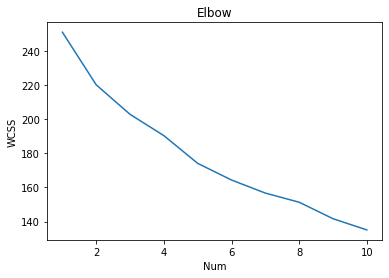

In [13]:
import matplotlib.pyplot as plt
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow')
plt.xlabel('Num')
plt.ylabel('WCSS')
plt.show()

In [14]:
n_clusters = 5
clf = KMeans(n_clusters=n_clusters,
            max_iter=100,
            init='k-means++',
            n_init=1)
labels = clf.fit_predict(X)
print(labels)
for index, sentence in enumerate(sentences):
    print(str(labels[index]) + ":" + str(sentence))

[3 0 0 0 0 0 0 4 0 0 4 0 0 1 4 0 4 2 0 0 0 0 0 1 0 4 0 4 0 0 3 0 3 0 0 0 0
 0 0 0 2 4 0 4 0 0 4 0 0 0 4 0 4 0 0 1 0 0 3 3 0 0 0 4 0 3 3 4 4]
3:['ถ้า', 'คน', 'เยอะ', 'ก็', 'ไม่', 'อยาก', 'ไป', 'ต่อ', 'คิว']
0:['ไม่มี', 'อะไร', 'น่ากิน']
0:['ถ้า', 'คิว', 'ยาว', 'ก็', 'ไม่', 'ซื้อ']
0:['ถ้า', 'ร้าน', 'นั้น', 'คน', 'เยอะ', 'ก็', 'จะ', 'ไป', 'เลือก', 'ร้าน', 'อื่น']
0:['ถ้า', 'แถว', 'ยาว', 'มาก', 'ก็', 'จะ', 'ขี้เกียจ', 'รอ']
0:['ถ้า', 'คน', 'เยอะ', 'มาก', 'ก็', 'เปลี่ยน', 'ร้าน', 'ไม่', 'อยาก', 'รอ']
0:['ถ้า', 'คน', 'เยอะ', 'เกินไป', 'ก็', 'จะ', 'ไม่', 'ซื้อ', 'เปลี่ยน', 'ร้าน', 'หรือไม่', 'กิน', 'เลย']
4:['ไม่มี', 'ร้านอาหาร', 'ที่', 'ชอบ']
0:['ขี้เกียจ', 'รอ', 'นานๆ', 'แล้ว', 'รู้สึก', 'ว่า', 'มัน', 'เสียเวลา']
0:['ถ้า', 'คิว', 'ยาว', 'เกิน', 'จะ', 'เลือก', 'ร้าน', 'อื่น', 'แทน']
4:['เบื่อ', 'ร้านอาหาร', 'ที่', 'มี', 'อยู่']
0:['อยาก', 'กิน', 'อาหาร', 'แปลกใหม่']
0:['โรงอาหาร', 'คน', 'เยอะ', 'ทำให้', 'ไม่', 'อยาก', 'ซื้อ']
1:['มี', 'เวลา', 'น้อย', 'ไม่', 'สามารถ', 'ต่อ', 'คิว', 'ได้']
4:

In [15]:
labels

array([3, 0, 0, 0, 0, 0, 0, 4, 0, 0, 4, 0, 0, 1, 4, 0, 4, 2, 0, 0, 0, 0,
       0, 1, 0, 4, 0, 4, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 2, 4, 0, 4,
       0, 0, 4, 0, 0, 0, 4, 0, 4, 0, 0, 1, 0, 0, 3, 3, 0, 0, 0, 4, 0, 3,
       3, 4, 4], dtype=int32)

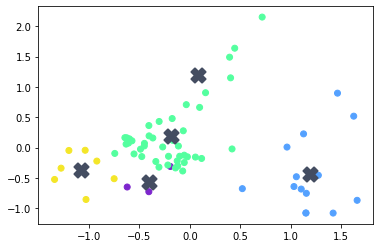

In [16]:
pca  = PCA(n_components=2).fit(X)
coords = pca.transform(X)
label_colors = ["#54FF9F", "#7D26CD", "#794044", "#F4E628","#54a1ff","#22d6c4","#22d6c4","#d65522","#cf1351"]
colors = [label_colors[i] for i in labels]
plt.scatter(coords[:, 0], coords[:, 1], c=colors)
centroids = clf.cluster_centers_
centroid_coords = pca.transform(centroids)
plt.scatter(centroid_coords[:, 0], centroid_coords[:, 1], marker='X', s=200, linewidths=2, c='#444d61')
plt.show()

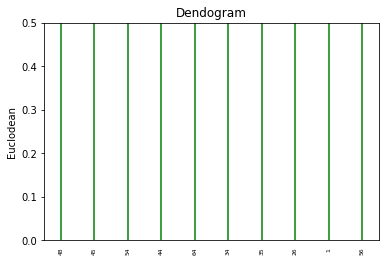

In [17]:
Z = hierarchy.linkage(X, 'ward')
dn = hierarchy.dendrogram(Z)
plt.title('Dendogram')
plt.ylabel('Euclodean')
plt.xlim(0,100)
plt.ylim(0,0.5)
plt.show()

In [42]:
hc = AgglomerativeClustering(n_clusters=5,
                             affinity='euclidean',
                            linkage='ward')
y_hc= hc.fit_predict(X)
print(y_hc)
for index, sentence in enumerate(sentences):
    print(str(y_hc[index]) + ":" + str(sentence))

[0 1 0 0 0 0 0 2 1 0 2 3 0 1 3 0 2 4 1 3 3 1 3 1 3 3 1 2 1 1 0 3 0 1 1 1 1
 1 1 3 4 2 1 2 1 1 2 1 1 1 1 0 2 1 1 1 1 0 0 0 3 1 3 2 1 0 0 3 3]
0:['ถ้า', 'คน', 'เยอะ', 'ก็', 'ไม่', 'อยาก', 'ไป', 'ต่อ', 'คิว']
1:['ไม่มี', 'อะไร', 'น่ากิน']
0:['ถ้า', 'คิว', 'ยาว', 'ก็', 'ไม่', 'ซื้อ']
0:['ถ้า', 'ร้าน', 'นั้น', 'คน', 'เยอะ', 'ก็', 'จะ', 'ไป', 'เลือก', 'ร้าน', 'อื่น']
0:['ถ้า', 'แถว', 'ยาว', 'มาก', 'ก็', 'จะ', 'ขี้เกียจ', 'รอ']
0:['ถ้า', 'คน', 'เยอะ', 'มาก', 'ก็', 'เปลี่ยน', 'ร้าน', 'ไม่', 'อยาก', 'รอ']
0:['ถ้า', 'คน', 'เยอะ', 'เกินไป', 'ก็', 'จะ', 'ไม่', 'ซื้อ', 'เปลี่ยน', 'ร้าน', 'หรือไม่', 'กิน', 'เลย']
2:['ไม่มี', 'ร้านอาหาร', 'ที่', 'ชอบ']
1:['ขี้เกียจ', 'รอ', 'นานๆ', 'แล้ว', 'รู้สึก', 'ว่า', 'มัน', 'เสียเวลา']
0:['ถ้า', 'คิว', 'ยาว', 'เกิน', 'จะ', 'เลือก', 'ร้าน', 'อื่น', 'แทน']
2:['เบื่อ', 'ร้านอาหาร', 'ที่', 'มี', 'อยู่']
3:['อยาก', 'กิน', 'อาหาร', 'แปลกใหม่']
0:['โรงอาหาร', 'คน', 'เยอะ', 'ทำให้', 'ไม่', 'อยาก', 'ซื้อ']
1:['มี', 'เวลา', 'น้อย', 'ไม่', 'สามารถ', 'ต่อ', 'คิว', 'ได้']
3:

In [50]:
l = []
l.append(sentence_vectorizer("อาหารที่อยากกินหทด")[0])
l.append(sentence_vectorizer("มีเวลาพักน้อย")[0])
l.append(sentence_vectorizer("คิวเยอะ")[0])
l.append(sentence_vectorizer("คิวยาวเกินไป")[0])
KL=np.array(l)
labels = clf.predict(KL)
print(labels)
# l = []
# l.append(sentence_vectorizer("มีเวลาพักน้อย")[0])
# KL=np.array(l)
# labels = clf.predict(KL)
# print(labels)

[4 1 0 0]


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


In [ ]:
def sentence_similarity(s1,s2):
    return cosine_similarity(sentence_vectorizer(str(s1)),sentence_vectorizer(str(s2)))
sentence_similarity("รอคิวนาน", "ควัน")